In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import math
import xgboost
import shap
shap.initjs()
#Read Input Dataset
data = pd.read_csv('mergedDataset.csv')
data = data[['id', 'player_position', 'player_name', 'last10_ratio_cleanSheets_opp', 'last10_ratio_cleanSheets_own', 'last10_ratio_wins_opp', 'last10_ratio_wins_own', 'last3_assists', 'last3_goals', 'last3_ratio_points', 'last3_ycards', 'opp_team_rank', 'player_team_rank', 'player_value', 'ratio_assists', 'ratio_attempted_passes', 'ratio_big_chancesCreated', 'ratio_big_chancesMiss', 'ratio_creativity', 'ratio_dribbles', 'ratio_fouls', 'ratio_goals_conceded_opp_team', 'ratio_goals_conceded_player_team', 'ratio_goals_opp_team', 'ratio_goals_player_team', 'ratio_goals_scored', 'ratio_key_passes', 'ratio_leading_goal', 'ratio_minutes_played', 'ratio_offsides', 'ratio_open_playcross', 'ratio_own_goals', 'ratio_penalties_conceded', 'ratio_penalties_missed', 'ratio_penalties_saved', 'ratio_saves', 'ratio_selection', 'ratio_tackles', 'ratio_threat', 'week_no', 'season', 'week_points']]


#Split Training & Testing Set
data_refined = data.loc[:,[i for i in list(data.columns) if i not in ['id', 'player_name', 'player_team', 'season']]]
#one-hot encoding for player position
data_refined = pd.get_dummies(data_refined, columns = ['player_position', 'week_no'], drop_first=True)

X = data_refined.drop('week_points', axis=1)
Y = data_refined["week_points"]

reg = RandomForestRegressor(random_state=0, criterion = 'mse', n_estimators = 100, min_samples_split = 15, n_jobs = -1,max_depth=8, min_samples_leaf=10).fit(X, Y)


explainer = shap.TreeExplainer(reg)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation
# shap.force_plot(explainer.expected_value, shap_values[2,:], X.iloc[0,:])
# shap.force_plot(explainer.expected_value, shap_values, X)


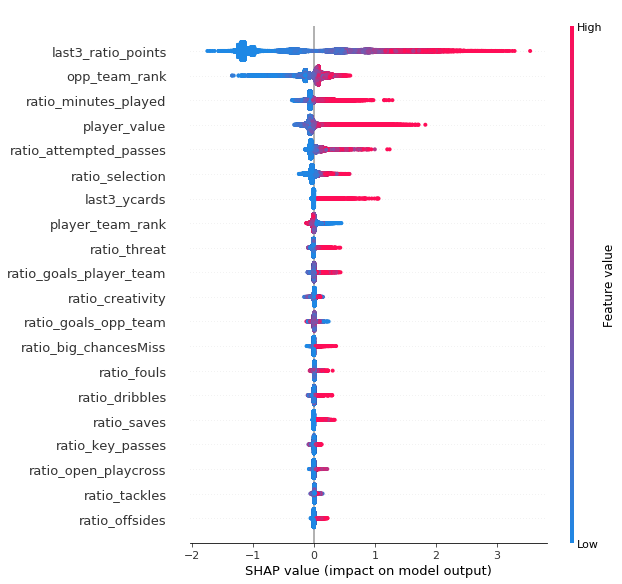

In [3]:
shap.summary_plot(shap_values, X)

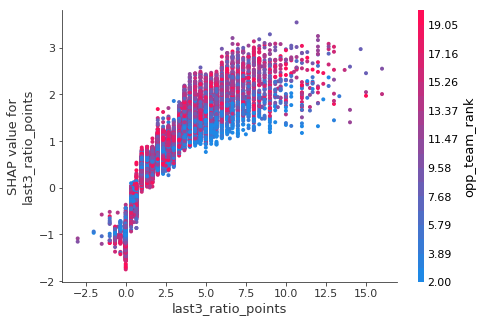

In [4]:
shap.dependence_plot("last3_ratio_points", shap_values, X)


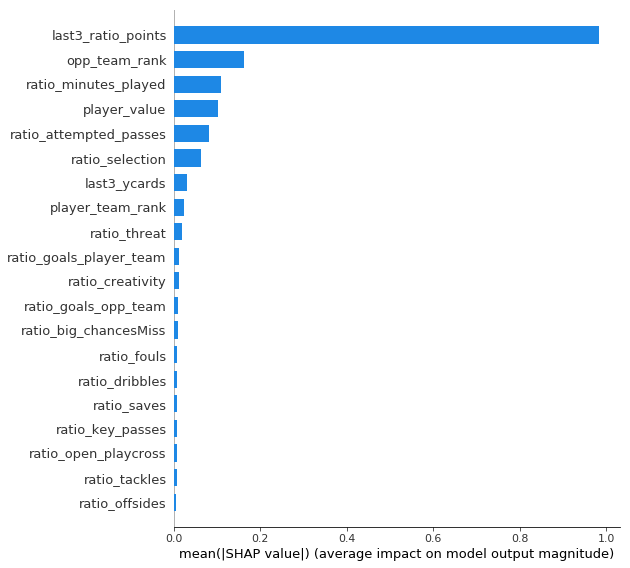

In [5]:
shap.summary_plot(shap_values, X, plot_type="bar")


In [21]:

shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[8,:])
